# Data exploration of the given data

## Import libraries

In [82]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn import model_selection
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from imblearn.over_sampling import SMOTE

## Load the data from files

In [2]:
churn_df = pd.read_csv('../input/churn_data.csv')
customer_df = pd.read_csv('../input/customer_data.csv')
internet_df = pd.read_csv('../input/internet_data.csv')

In [3]:
churn_df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
customer_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
internet_df.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [6]:
# We can merge the dataframes to get all data in one dataframe
telecom_df = pd.merge(customer_df, internet_df, on='customerID')
telecom_df = pd.merge(telecom_df, churn_df, on='customerID')

In [7]:
telecom_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,...,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,...,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,...,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,...,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
telecom_df.shape

(7043, 21)

In [9]:
# Check data types
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  tenure            7043 non-null   int64  
 14  PhoneService      7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We have mostly columns as categorical data columns.

In [10]:
# Check for number of unique values in each feature
telecom_df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
tenure                73
PhoneService           2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [11]:
# Convert SeniorCitizen as category
telecom_df['SeniorCitizen'] = telecom_df['SeniorCitizen'].astype('category')

In [12]:
# TotalCharges should be numeric but it is shown as object type.
telecom_df['TotalCharges'] = pd.to_numeric(telecom_df['TotalCharges'], errors='coerce')
telecom_df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


## Data Visualization

### Visualize numerical columns

In [13]:
num_cols = telecom_df.select_dtypes(include=['int', 'float']).columns
num_cols

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

#### Pair plot

<Figure size 864x720 with 0 Axes>

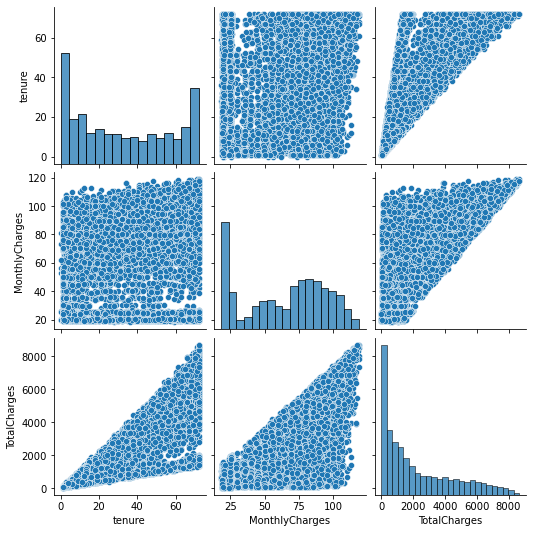

In [14]:
# Pair plot for numeric columns
plt.figure(figsize=(12, 10))
sns.pairplot(telecom_df[num_cols])
plt.show()

Insights:
- Total charges correlated with tenure, Monthly charges
- Total charges is right skewed

#### Tenure vs Churn

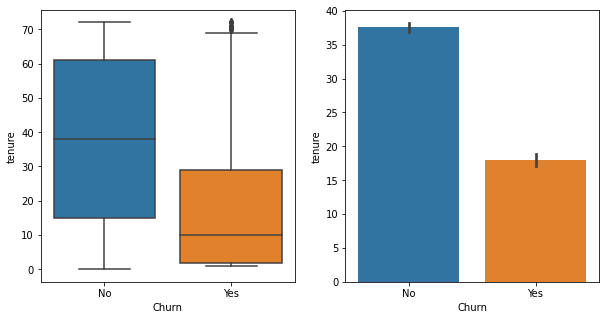

In [15]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.boxplot(x='Churn', y='tenure', data=telecom_df)
plt.subplot(122)
sns.barplot(x='Churn', y='tenure', data=telecom_df)
plt.show()

Insights:
When tenure is more, there's less likely chance to churn.

#### Monthly charges vs Churn

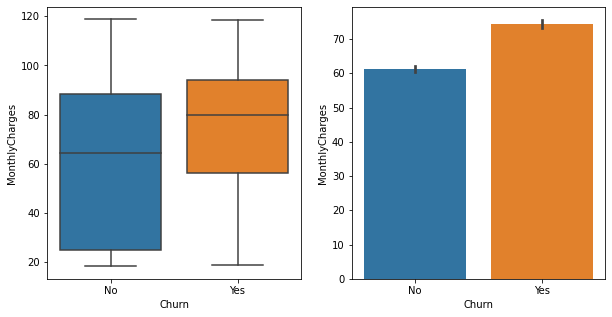

In [16]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.boxplot(x='Churn', y='MonthlyCharges', data=telecom_df)
plt.subplot(122)
sns.barplot(x='Churn', y='MonthlyCharges', data=telecom_df)
plt.show()

Insights:
When monthly charges are more, there's more likely chance to Churn.

#### Total charges vs Churn

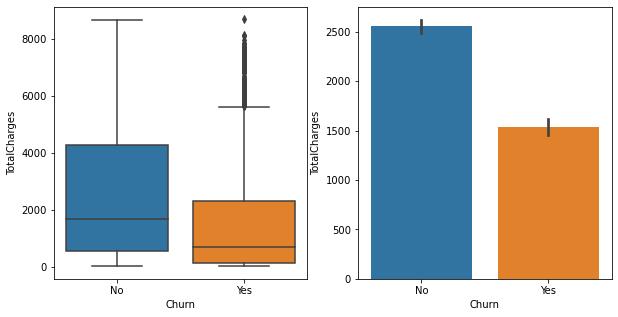

In [17]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.boxplot(x='Churn', y='TotalCharges', data=telecom_df)
plt.subplot(122)
sns.barplot(x='Churn', y='TotalCharges', data=telecom_df)
plt.show()

Insights: When Total charges are less, then there's more likely chance to Churn.

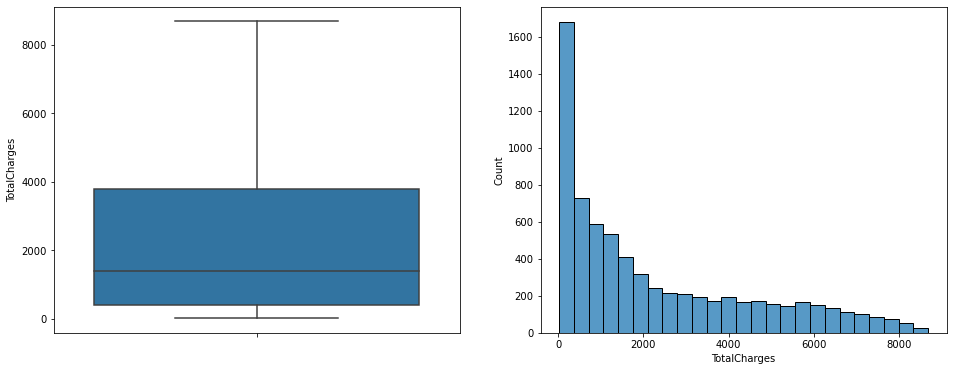

In [18]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.boxplot(y='TotalCharges', data=telecom_df)
plt.subplot(122)
sns.histplot(data=telecom_df, x='TotalCharges')
plt.show()

Insights: TotalCharges is right skewed. 50% of the data lies below 2000.

### Visualize categorical columns

In [19]:
cat_cols = telecom_df.select_dtypes(include=['object', 'category']).columns
cat_cols

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PhoneService', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')

In [20]:
# Remove customerID, Churn
cat_cols = cat_cols.drop(['customerID', 'Churn'])
cat_cols

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PhoneService',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

#### Categorical features vs Churn

In [21]:
def plot_cat_features():
    # plt.figure(figsize=(12,12))
    fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(16,12))
    for i, col in enumerate(cat_cols):
        row_index = i // 4
        col_index = i % 4
        ax = axs[row_index, col_index]
        sns.countplot(x=col, hue='Churn', data=telecom_df, ax=ax)
        ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

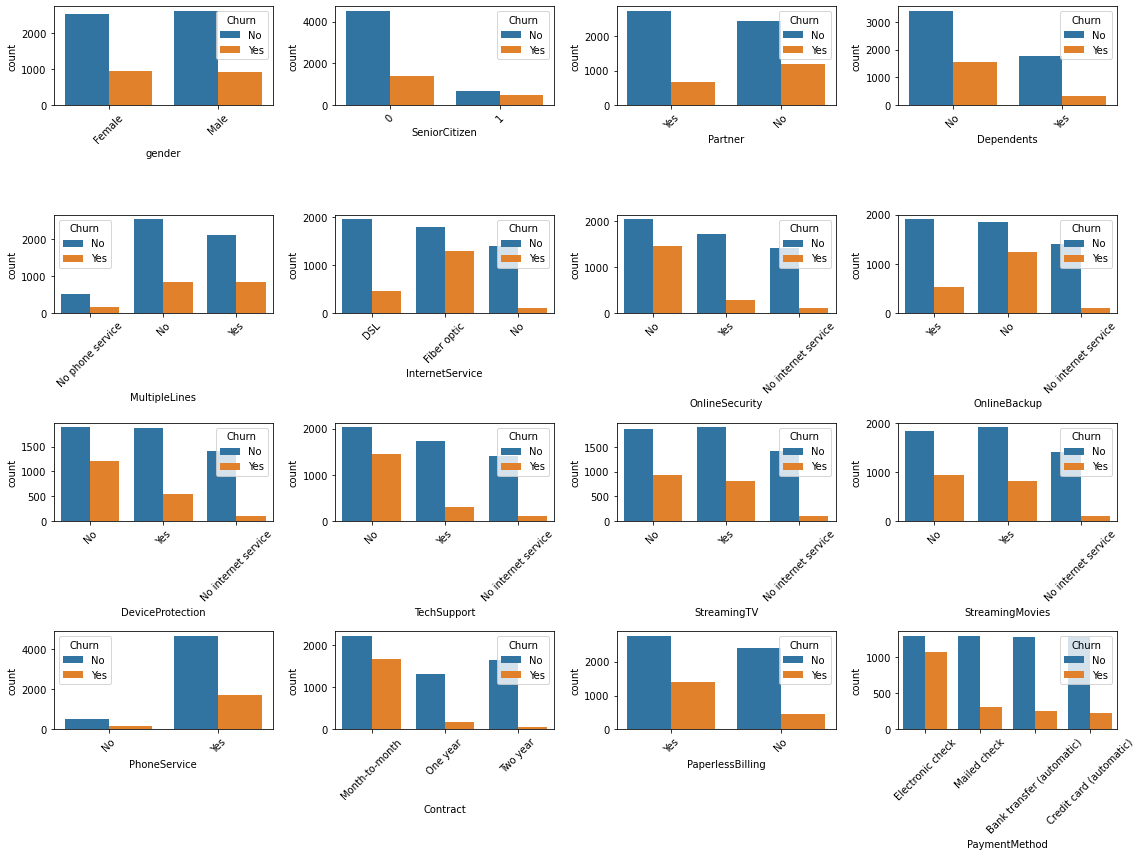

In [22]:
plot_cat_features()

Insights:

- SeniorCitizens have more Churn percentage
- Partner=No has more Churn percentage
- Dependents=No has more Churn percentage
- InternetService=FiberOptic has more Churn percentage
- OnlineSecurity=No has more Churn percentage
- OnlineBackup=No has more Churn percentange
- DeviceProtection=No has more Churn percentage
- TechSupport=No has more Churn percentage
- PhoneService=Yes has more Churn percentage
- Contract=Month-to-month has more Churn percentage
- PaperlessBilling=Yes has more Churn percentage
- PaymentMethod=ElectronicCheck has more Churn percentage

## Data preprocessing

### Handle categorical features

In [23]:
nunique_df = telecom_df.nunique()
cols_unique_lt_10 = nunique_df.loc[nunique_df.values < 10].index
cols_unique_lt_10

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PhoneService',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [24]:
for col in cols_unique_lt_10:
    print(col)
    print(telecom_df[col].unique())
    print('-'*10)

gender
['Female' 'Male']
----------
SeniorCitizen
[0, 1]
Categories (2, int64): [0, 1]
----------
Partner
['Yes' 'No']
----------
Dependents
['No' 'Yes']
----------
MultipleLines
['No phone service' 'No' 'Yes']
----------
InternetService
['DSL' 'Fiber optic' 'No']
----------
OnlineSecurity
['No' 'Yes' 'No internet service']
----------
OnlineBackup
['Yes' 'No' 'No internet service']
----------
DeviceProtection
['No' 'Yes' 'No internet service']
----------
TechSupport
['No' 'Yes' 'No internet service']
----------
StreamingTV
['No' 'Yes' 'No internet service']
----------
StreamingMovies
['No' 'Yes' 'No internet service']
----------
PhoneService
['No' 'Yes']
----------
Contract
['Month-to-month' 'One year' 'Two year']
----------
PaperlessBilling
['Yes' 'No']
----------
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
----------
Churn
['No' 'Yes']
----------


In [25]:
# Let's map 'Yes':1, 'No':0
yes_no_map = {'Yes':1, 'No':0}

cols_w_yes_no_values = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in cols_w_yes_no_values:
    telecom_df.loc[:, col] = telecom_df[col].map(yes_no_map)
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   int64   
 4   Dependents        7043 non-null   int64   
 5   MultipleLines     7043 non-null   object  
 6   InternetService   7043 non-null   object  
 7   OnlineSecurity    7043 non-null   object  
 8   OnlineBackup      7043 non-null   object  
 9   DeviceProtection  7043 non-null   object  
 10  TechSupport       7043 non-null   object  
 11  StreamingTV       7043 non-null   object  
 12  StreamingMovies   7043 non-null   object  
 13  tenure            7043 non-null   int64   
 14  PhoneService      7043 non-null   int64   
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

In [26]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   int64   
 4   Dependents        7043 non-null   int64   
 5   MultipleLines     7043 non-null   object  
 6   InternetService   7043 non-null   object  
 7   OnlineSecurity    7043 non-null   object  
 8   OnlineBackup      7043 non-null   object  
 9   DeviceProtection  7043 non-null   object  
 10  TechSupport       7043 non-null   object  
 11  StreamingTV       7043 non-null   object  
 12  StreamingMovies   7043 non-null   object  
 13  tenure            7043 non-null   int64   
 14  PhoneService      7043 non-null   int64   
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

In [27]:
cols_cat = telecom_df.drop('customerID', axis=1).select_dtypes(include=['category', 'object']).columns
cols_cat

Index(['gender', 'SeniorCitizen', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'],
      dtype='object')

In [28]:
# Convert cols_cat into dummies
cat_df = pd.get_dummies(telecom_df[cols_cat], drop_first=True)
cat_df.head()

,gender_Male,SeniorCitizen_1,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [29]:
# Now, we have cat_df, we can concat with telecom_df and then remove original cols_cat
telecom_df = pd.concat([telecom_df, cat_df], axis=1)
telecom_df.drop(cols_cat, axis=1, inplace=True)
telecom_df.head()

,customerID,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,1,0,1,29.85,29.85,0,0,...,0,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,0,0,34,1,0,56.95,1889.50,0,1,...,0,0,0,0,0,1,0,0,0,1
2,3668-QPYBK,0,0,2,1,1,53.85,108.15,1,1,...,0,0,0,0,0,0,0,0,0,1
3,7795-CFOCW,0,0,45,0,0,42.30,1840.75,0,1,...,1,0,0,0,0,1,0,0,0,0
4,9237-HQITU,0,0,2,1,1,70.70,151.65,1,0,...,0,0,0,0,0,0,0,0,1,0


In [30]:
# Check data types once more
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   Partner                                7043 non-null   int64  
 2   Dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   int64  
 4   PhoneService                           7043 non-null   int64  
 5   PaperlessBilling                       7043 non-null   int64  
 6   MonthlyCharges                         7043 non-null   float64
 7   TotalCharges                           7032 non-null   float64
 8   Churn                                  7043 non-null   int64  
 9   gender_Male                            7043 non-null   uint8  
 10  SeniorCitizen_1                        7043 non-null   uint8  
 11  Mult

### Handle missing values

In [31]:
# Check for missing values
telecom_df.isnull().mean()

customerID                               0.000000
Partner                                  0.000000
Dependents                               0.000000
tenure                                   0.000000
PhoneService                             0.000000
PaperlessBilling                         0.000000
MonthlyCharges                           0.000000
TotalCharges                             0.001562
Churn                                    0.000000
gender_Male                              0.000000
SeniorCitizen_1                          0.000000
MultipleLines_No phone service           0.000000
MultipleLines_Yes                        0.000000
InternetService_Fiber optic              0.000000
InternetService_No                       0.000000
OnlineSecurity_No internet service       0.000000
OnlineSecurity_Yes                       0.000000
OnlineBackup_No internet service         0.000000
OnlineBackup_Yes                         0.000000
DeviceProtection_No internet service     0.000000


TotalCharges are missing only 0.16%, we can safely remove those datapoints.

In [32]:
# Drop na rows 
telecom_df.dropna(axis=0, inplace=True)

In [33]:
telecom_df.shape

(7032, 32)

In [34]:
telecom_df.describe()

,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.482509,0.298493,32.421786,0.903299,0.592719,64.798208,2283.300441,0.265785,0.504693,0.162400,...,0.290102,0.216155,0.384386,0.216155,0.388367,0.209329,0.239619,0.216297,0.336320,0.228100
std,0.499729,0.457629,24.545260,0.295571,0.491363,30.085974,2266.771362,0.441782,0.500014,0.368844,...,0.453842,0.411650,0.486484,0.411650,0.487414,0.406858,0.426881,0.411748,0.472483,0.419637
min,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,401.450000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,3794.737500,1.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
# Drop 'CustomerID'
telecom_df.drop('customerID', axis=1, inplace=True)

### Handle duplicated rows

In [36]:
telecom_df.duplicated().sum()

22

In [37]:
# Drop duplicates
telecom_df.drop_duplicates(inplace=True)

In [38]:
telecom_df.shape

(7010, 31)

## Data Preparation

In [39]:
# Split X, y
X = telecom_df.drop('Churn', axis=1)
y = telecom_df['Churn']

In [40]:
# Split the X, y into train, val datasets
X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y, test_size=0.3, random_state=100)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(4907, 30) (4907,)
(2103, 30) (2103,)


### Data standardization

In [41]:
# Scale the features using Standard scaler
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

## Modelling

### Logistic Regression

Baseline model i.e train on all features

In [42]:
# Perform LogisticRegression modelling
log_reg_1 = linear_model.LogisticRegression()

# Fit the train data
log_reg_1.fit(X_train_scaled, y_train)

y_val_preds = log_reg_1.predict(X_val_scaled)

In [43]:
print(metrics.classification_report(y_val, y_val_preds))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1519
           1       0.70      0.55      0.62       584

    accuracy                           0.81      2103
   macro avg       0.77      0.73      0.75      2103
weighted avg       0.80      0.81      0.80      2103



In above report, we can see that:
- The data is imbalanced.
  - Data points for 0 is 1519, while
  - Data points for 1 is 584
- If we look at class 0, 
  - we're able to predict 91% correctly
  - Also, out of all predictions for Class 0, only 84% are actual Class 0
  - It seems to be decent performance for class 0
- If we look at class 1,
  - we're able to predict only 55% correctly
  - Also, out of all predictions for Class 1, only 70% are actual class 1
  - It seems like we're underfitting on Class 1 (might be because of less data for Class 1)

## Handle multicollinearity

Let's check correlation between features

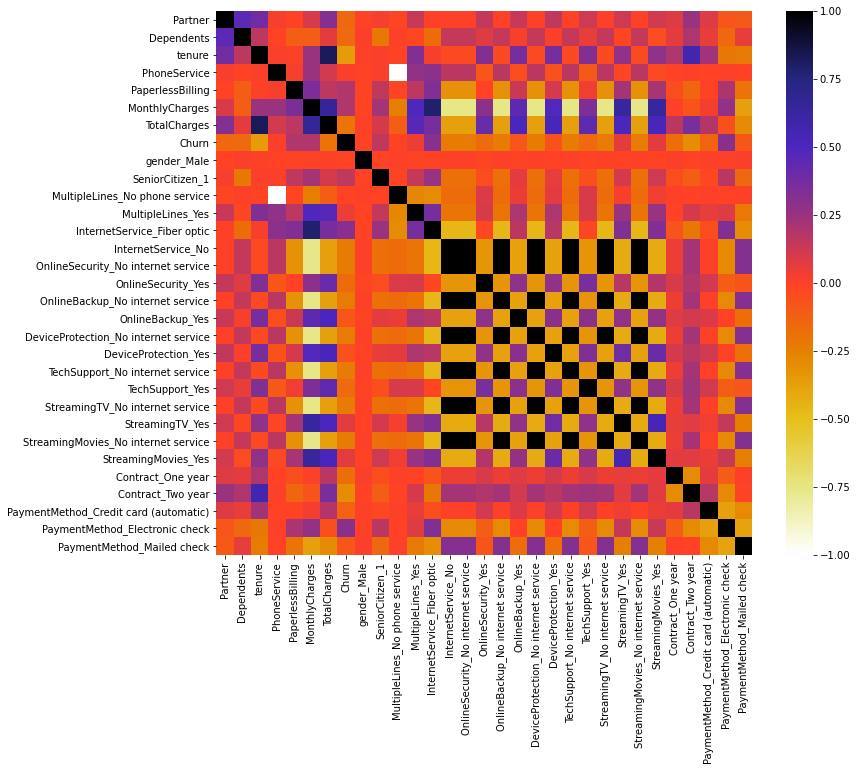

In [44]:
corr_df = telecom_df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_df,annot=False, cmap=plt.cm.CMRmap_r)
plt.show()


Insights, we have few features which are highly correlated with each other.

In [45]:
def filter_correlated_features(df, threshold):
    cols_corr = set()
    corr_df = df.corr()
    for i in range(len(corr_df.columns)):
        for j in range(i):
            if abs(corr_df.iloc[i, j]) > threshold:
                cols_corr.add(corr_df.columns[i])
    return cols_corr

In [46]:
cols_corr = filter_correlated_features(telecom_df, threshold=0.7)
cols_corr

{'DeviceProtection_No internet service',
 'InternetService_Fiber optic',
 'InternetService_No',
 'MultipleLines_No phone service',
 'OnlineBackup_No internet service',
 'OnlineSecurity_No internet service',
 'StreamingMovies_No internet service',
 'StreamingTV_No internet service',
 'TechSupport_No internet service',
 'TotalCharges'}

In [47]:
data = telecom_df.copy()
data.drop(cols_corr, axis=1, inplace=True)

## P-Test

In [48]:
X = data.drop('Churn', axis=1)
y = data['Churn']

Let's verify statistical significance for different features.

In [49]:
# Add constant to X
X = sm.add_constant(X)

# Split into train, validation sets
X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y, test_size=0.3, random_state=100)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(4907, 21) (4907,)
(2103, 21) (2103,)


In [50]:
# StatsModels => Logit model

log_reg_sm = sm.Logit(y_train, X_train)

results = log_reg_sm.fit()

print(results.summary())

Optimization terminated successfully.
         Current function value: 0.417473
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4907
Model:                          Logit   Df Residuals:                     4886
Method:                           MLE   Df Model:                           20
Date:                Sat, 24 Jul 2021   Pseudo R-squ.:                  0.2707
Time:                        09:30:54   Log-Likelihood:                -2048.5
converged:                       True   LL-Null:                       -2809.0
Covariance Type:            nonrobust   LLR p-value:                1.248e-310
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.0574      

In this summary, we can see there are features which are not statistical significant.

- Let's first remove top 4 insignificant features, ['gender_Male', 'StreamingTV_Yes', 'PaymentMethod_Credit card (automatic)','PaymentMethod_Mailed check']

In [51]:
cols_insigni = ['gender_Male', 'StreamingTV_Yes', 'PaymentMethod_Credit card (automatic)','PaymentMethod_Mailed check']

X.drop(cols_insigni, axis=1, inplace=True)

In [52]:
# Split into train, validation sets
X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y, test_size=0.3, random_state=100)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(4907, 17) (4907,)
(2103, 17) (2103,)


In [53]:
# StatsModel
log_reg_sm_2 = sm.Logit(y_train, X_train)

results = log_reg_sm_2.fit()

print(results.summary())

Optimization terminated successfully.
         Current function value: 0.417510
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4907
Model:                          Logit   Df Residuals:                     4890
Method:                           MLE   Df Model:                           16
Date:                Sat, 24 Jul 2021   Pseudo R-squ.:                  0.2707
Time:                        09:31:15   Log-Likelihood:                -2048.7
converged:                       True   LL-Null:                       -2809.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.0167      0.149     -6.818     

In this summary, we can still see features which are not statistical significant.

- Let's first remove top 4 insignificant features, ['Partner', 'StreamingMovies_Yes', 'DeviceProtection_Yes','MultipleLines_Yes']

In [54]:
cols_insigni = ['Partner', 'StreamingMovies_Yes', 'DeviceProtection_Yes','MultipleLines_Yes']

X = X.drop(cols_insigni, axis=1)

In [55]:
# Split into train, validation sets
X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y, test_size=0.3, random_state=100)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(4907, 13) (4907,)
(2103, 13) (2103,)


In [56]:
log_reg_sm_3 = sm.Logit(y_train, X_train)

results = log_reg_sm_3.fit()

print(results.summary())

Optimization terminated successfully.
         Current function value: 0.418352
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4907
Model:                          Logit   Df Residuals:                     4894
Method:                           MLE   Df Model:                           12
Date:                Sat, 24 Jul 2021   Pseudo R-squ.:                  0.2692
Time:                        09:31:20   Log-Likelihood:                -2052.9
converged:                       True   LL-Null:                       -2809.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.0616      0.145     -7.344     

Now, we have all significant columns.

## Model evaluation

In [57]:
y_val_preds = results.predict(X_val)

y_val_preds[:5]

1809    0.598209
2940    0.351903
2887    0.399929
6952    0.401293
5139    0.010498
dtype: float64

In [58]:
churn_df = pd.DataFrame()

churn_df['Churn'] = y_val
churn_df['Predict_Probs'] = y_val_preds

In [59]:
churn_df.head()

,Churn,Predict_Probs
1809,1,0.598209
2940,1,0.351903
2887,1,0.399929
6952,1,0.401293
5139,0,0.010498


In [60]:
# Check for thresholds which gives better precision, recall
thresholds = np.arange(0, 1, 0.1)
thresholds

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [61]:
for thresh in thresholds:
    churn_df[round(thresh, 1)] = np.where(churn_df['Predict_Probs'] > thresh, 1, 0)
churn_df.head(10)

,Churn,Predict_Probs,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1809,1,0.598209,1,1,1,1,1,1,0,0,0,0
2940,1,0.351903,1,1,1,1,0,0,0,0,0,0
2887,1,0.399929,1,1,1,1,0,0,0,0,0,0
6952,1,0.401293,1,1,1,1,1,0,0,0,0,0
5139,0,0.010498,1,0,0,0,0,0,0,0,0,0
3208,0,0.087422,1,0,0,0,0,0,0,0,0,0
861,0,0.036998,1,0,0,0,0,0,0,0,0,0
832,0,0.012857,1,0,0,0,0,0,0,0,0,0
344,0,0.028185,1,0,0,0,0,0,0,0,0,0
4252,0,0.339039,1,1,1,1,0,0,0,0,0,0


In [62]:
metrics_df = pd.DataFrame(columns=['Thresh', 'TPR', 'FPR'])
for thresh in thresholds:
    thresh = round(thresh, 1)
    conf = metrics.confusion_matrix(churn_df['Churn'], churn_df[thresh])
    tn = conf[0,0]
    fn = conf[1,0]
    fp = conf[0,1]
    tp = conf[1,1]
    metrics_df.loc[thresh] = [thresh, tp/(tp+fn), fp/(fp+tn)]
metrics_df

,Thresh,TPR,FPR
0.0,0.0,1.000000,1.000000
0.1,0.1,0.945205,0.497038
0.2,0.2,0.856164,0.324556
0.3,0.3,0.773973,0.221856
0.4,0.4,0.652397,0.139566
0.5,0.5,0.544521,0.090191
0.6,0.6,0.364726,0.046741
0.7,0.7,0.164384,0.017775
0.8,0.8,0.027397,0.001317
0.9,0.9,0.000000,0.000000


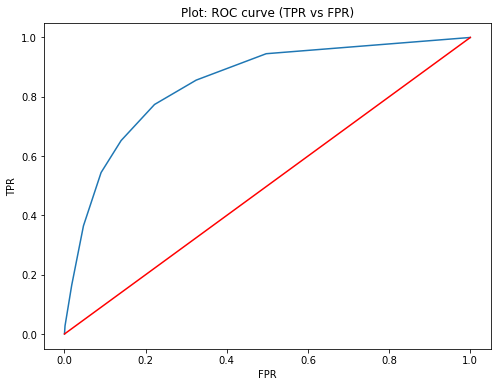

In [63]:
plt.figure(figsize=(8,6))
plt.plot(metrics_df['FPR'], metrics_df['TPR'])
plt.plot([0,1],[0,1],'r-')
plt.title('Plot: ROC curve (TPR vs FPR)')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

## Check for variance in features

In [71]:
# Take columns from last stats model
data = telecom_df[X.columns[1:]]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7010 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Dependents                      7010 non-null   int64  
 1   tenure                          7010 non-null   int64  
 2   PhoneService                    7010 non-null   int64  
 3   PaperlessBilling                7010 non-null   int64  
 4   MonthlyCharges                  7010 non-null   float64
 5   SeniorCitizen_1                 7010 non-null   uint8  
 6   OnlineSecurity_Yes              7010 non-null   uint8  
 7   OnlineBackup_Yes                7010 non-null   uint8  
 8   TechSupport_Yes                 7010 non-null   uint8  
 9   Contract_One year               7010 non-null   uint8  
 10  Contract_Two year               7010 non-null   uint8  
 11  PaymentMethod_Electronic check  7010 non-null   uint8  
dtypes: float64(1), int64(4), uint8(7)


In [72]:
vif_df = pd.DataFrame({'features':data.columns})
vif_df

,features
0,Dependents
1,tenure
2,PhoneService
3,PaperlessBilling
4,MonthlyCharges
5,SeniorCitizen_1
6,OnlineSecurity_Yes
7,OnlineBackup_Yes
8,TechSupport_Yes
9,Contract_One year


In [73]:
vif_df['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif_df.sort_values(by='VIF', ascending=False)

,features,VIF
4,MonthlyCharges,12.601118
2,PhoneService,6.865922
1,tenure,6.491492
10,Contract_Two year,3.220038
3,PaperlessBilling,2.816503
7,OnlineBackup_Yes,2.168238
8,TechSupport_Yes,1.999489
9,Contract_One year,1.936263
11,PaymentMethod_Electronic check,1.877138
6,OnlineSecurity_Yes,1.846505


In [74]:
cols_vars_lt_10 = vif_df.loc[vif_df['VIF'] < 10]['features'].values
cols_vars_lt_10

array(['Dependents', 'tenure', 'PhoneService', 'PaperlessBilling',
       'SeniorCitizen_1', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'TechSupport_Yes', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check'], dtype=object)

In [75]:
data = data[cols_vars_lt_10]
data.head()

,Dependents,tenure,PhoneService,PaperlessBilling,SeniorCitizen_1,OnlineSecurity_Yes,OnlineBackup_Yes,TechSupport_Yes,Contract_One year,Contract_Two year,PaymentMethod_Electronic check
0,0,1,0,1,0,0,1,0,0,0,1
1,0,34,1,0,0,1,0,0,1,0,0
2,0,2,1,1,0,1,1,0,0,0,0
3,0,45,0,0,0,1,0,1,1,0,0
4,0,2,1,1,0,0,0,0,0,0,1


In [76]:
X = data

In [79]:
log_reg_cv = linear_model.LogisticRegression()

f1_scores = model_selection.cross_val_score(log_reg_cv, X, y, scoring='f1', cv=5)

print(f1_scores)

[0.48852459 0.51851852 0.5056     0.52231405 0.49265905]


In [80]:
log_reg_cv = linear_model.LogisticRegression()

p_scores = model_selection.cross_val_score(log_reg_cv, X, y, scoring='precision', cv=5)

print(p_scores)

[0.62343096 0.60649819 0.62204724 0.67811159 0.62655602]


In [81]:
log_reg_cv = linear_model.LogisticRegression()

r_scores = model_selection.cross_val_score(log_reg_cv, X, y, scoring='recall', cv=5)

print(r_scores)

[0.40161725 0.45283019 0.42587601 0.42473118 0.40591398]


After above observation, it looks like our model is just able to predict ~40% actual correct values. Also, out of all positive predictions, only ~60% are correct values.

Because our data is imbalanced, we can perform SMOTE to balance our classes data points.

## SMOTE

In [83]:
os = SMOTE(random_state=100)

In [84]:
X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y, test_size=0.3, random_state=100)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(4907, 11) (4907,)
(2103, 11) (2103,)


In [85]:
os_data_X, os_data_y = os.fit_sample(X_train, y_train)

os_data_X = pd.DataFrame(os_data_X, columns=X_train.columns)
os_data_y = pd.DataFrame(os_data_y, columns=['Churn'])

In [86]:
print(os_data_X.shape)
print(os_data_y.shape)

(7268, 11)
(7268, 1)


In [87]:
os_data_y.value_counts()

Churn
0        3634
1        3634
dtype: int64

Now, let's perform logistic regression again on the oversampled data.

In [95]:
X = os_data_X
y = os_data_y.values.ravel()

print(y.shape)

(7268,)


In [99]:
log_reg_os = linear_model.LogisticRegression()

f1_scores = model_selection.cross_val_score(log_reg_os, X, y, scoring='f1', cv=5)

print(f1_scores)

[0.74613402 0.74122237 0.79950648 0.79599499 0.81215805]


/opt/homebrew/Caskroom/miniforge/base/envs/base-ds-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [100]:
log_reg_os = linear_model.LogisticRegression()

p_scores = model_selection.cross_val_score(log_reg_os, X, y, scoring='precision', cv=5)

print(p_scores)

[0.70181818 0.702836   0.72483221 0.7293578  0.72766885]


/opt/homebrew/Caskroom/miniforge/base/envs/base-ds-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [101]:
log_reg_os = linear_model.LogisticRegression()

r_scores = model_selection.cross_val_score(log_reg_os, X, y, scoring='recall', cv=5)

print(r_scores)

[0.79642366 0.78404402 0.89133425 0.87603306 0.91884457]


/opt/homebrew/Caskroom/miniforge/base/envs/base-ds-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Now, as you can observe, we do have good precision, recall, f1 scores. We get warning from logistic regression that maximum iterations has reached before convergence. But overall SMOTE has helper in improving scores.

In [103]:
X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y, test_size=0.3, random_state=100)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(5087, 11) (5087,)
(2181, 11) (2181,)


In [105]:
log_reg_2 = linear_model.LogisticRegression()
log_reg_2.fit(X_train, y_train)

y_val_preds = log_reg_2.predict(X_val)

accuracy_score = metrics.accuracy_score(y_val, y_val_preds)

print(accuracy_score)

0.7505731315910132


In [106]:
print(metrics.classification_report(y_val, y_val_preds))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73      1075
           1       0.72      0.82      0.77      1106

    accuracy                           0.75      2181
   macro avg       0.76      0.75      0.75      2181
weighted avg       0.75      0.75      0.75      2181



In [109]:
y_val_pred_probs = log_reg_2.predict_proba(X_val)[:, 1]

In [110]:
predict_df = pd.DataFrame()
predict_df['Churn'] = y_val
predict_df['Predicted_Probs'] = y_val_pred_probs

predict_df

,Churn,Predicted_Probs
0,1,0.837410
1,0,0.745531
2,0,0.318864
3,1,0.125627
4,0,0.097920
...,...,...
2176,1,0.758288
2177,0,0.109609
2178,0,0.670054
2179,0,0.264722


In [111]:
thresholds = np.arange(0, 1, 0.1)

In [113]:
metrics_df = pd.DataFrame(columns=['Accuracy', 'Sensitivity', 'Specificity'])
for thresh in thresholds:
    thresh = round(thresh, 1)
    preds = np.where(predict_df.Predicted_Probs > thresh, 1, 0)
    predict_df[thresh] = preds

    conf_mat = metrics.confusion_matrix(predict_df.Churn, preds)

    tn = conf_mat[0,0]
    fn = conf_mat[1,0]
    fp = conf_mat[0,1]
    tp = conf_mat[1,1]

    accur = (tp+tn)/(tp+fp+fn+tn)
    sensi = tp/(tp+fn)
    speci = tn/(fp+tn)

    metrics_df.loc[thresh] = [accur, sensi, speci]

predict_df.head(10)

,Churn,Predicted_Probs,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.837410,1,1,1,1,1,1,1,1,1,0
1,0,0.745531,1,1,1,1,1,1,1,1,0,0
2,0,0.318864,1,1,1,1,0,0,0,0,0,0
3,1,0.125627,1,1,0,0,0,0,0,0,0,0
4,0,0.097920,1,0,0,0,0,0,0,0,0,0
5,1,0.190386,1,1,0,0,0,0,0,0,0,0
6,0,0.052455,1,0,0,0,0,0,0,0,0,0
7,0,0.379676,1,1,1,1,0,0,0,0,0,0
8,1,0.581980,1,1,1,1,1,1,0,0,0,0
9,1,0.646159,1,1,1,1,1,1,1,0,0,0


In [114]:
metrics_df

,Accuracy,Sensitivity,Specificity
0.0,0.507107,1.000000,0.000000
0.1,0.662540,0.975588,0.340465
0.2,0.710683,0.942134,0.472558
0.3,0.737735,0.917722,0.552558
0.4,0.759285,0.892405,0.622326
0.5,0.750573,0.821881,0.677209
0.6,0.736818,0.735081,0.738605
0.7,0.700138,0.558770,0.845581
0.8,0.595598,0.241410,0.960000
0.9,0.492893,0.000000,1.000000


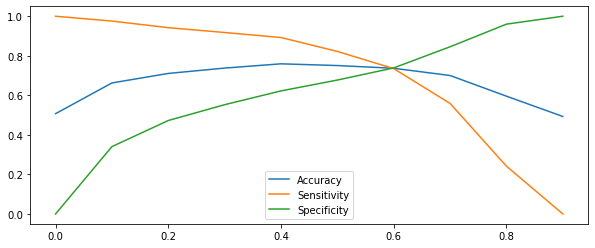

In [115]:
plt.figure(figsize=(10,4))
plt.plot(metrics_df.index, metrics_df['Accuracy'], label='Accuracy')
plt.plot(metrics_df.index, metrics_df['Sensitivity'], label='Sensitivity')
plt.plot(metrics_df.index, metrics_df['Specificity'], label='Specificity')
plt.legend()
plt.show()

0.6 is the best threshold.

In [116]:
metrics.confusion_matrix(predict_df.Churn, predict_df[0.6])

array([[794, 281],
       [293, 813]])

In [117]:
metrics.accuracy_score(predict_df.Churn, predict_df[0.6])

0.7368179734066942